<a href="https://colab.research.google.com/github/Sak-shi-src/PRODIGY_ML_TASK03/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing neccessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Load images from dataset directory
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, image_size)
            img = img.flatten()
            images.append(img)
            labels.append(label)
    return images, labels


In [6]:
# Define paths to the dataset
cat_folder = '/content/dataset/cats'
dog_folder = '/content/dataset/dogs'


In [7]:
# Load data
cat_images, cat_labels = load_images_from_folder(cat_folder, label=0)
dog_images, dog_labels = load_images_from_folder(dog_folder, label=1)

In [8]:
# Combine datasets
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Predictions
y_pred = svm_model.predict(X_test)

In [14]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.5875
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       207
           1       0.58      0.55      0.56       193

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400



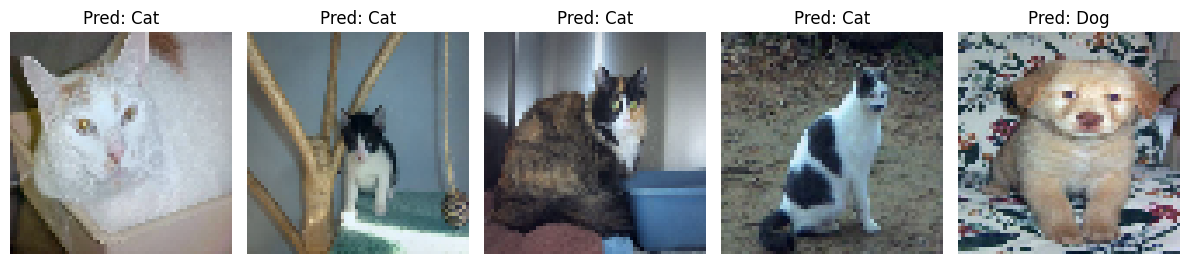

In [15]:
# Visualization of predictions
fig, axes = plt.subplots(1, 5, figsize=(12, 6))

for i, ax in enumerate(axes):
    # Convert the image back to its original shape (assuming color images)
    img = X_test[i].reshape(64, 64, 3)  # Ensure correct shape

    # Rescale image if it was normalized
    img = (img - img.min()) / (img.max() - img.min())  # Normalize between 0-1
    img = (img * 255).astype(np.uint8)  # Convert back to 0-255 range

    # Convert from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    ax.imshow(img_rgb)
    ax.set_title(f'Pred: {"Dog" if y_pred[i] == 1 else "Cat"}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()
